Breast Cancer Project

In [34]:
# Import Python modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning modules

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 



In [2]:
# Import the dataset

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
x = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
#print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
#print(breast_cancer_wisconsin_diagnostic.variables)

In [3]:
x.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [5]:
# Transform 'Diagnosis' into a binary variable
diagnosis_binary = np.where(y['Diagnosis'] == 'M', 1, 0)

# Create a new DataFrame with the transformed 'Diagnosis' column
y_transformed = pd.DataFrame({'Diagnosis': diagnosis_binary}, index=y.index)
y_transformed.head()


,Diagnosis
0,1
1,1
2,1
3,1
4,1


#### Splitting the Data

In this split, 20% of the data is reserved for final validation, while 80% is allocated for training the model.

In [15]:
# Splitting the data

#Validation chunk size
val_size = 0.20

#Split the data into chunks
x_train, x_test, y_train, y_test = train_test_split(x, y_transformed, test_size=val_size, random_state = 42)

#### Prediction

- **Model Building:** 
  
  1. Logistic Regression
  2. K Nearest Neighbor
  3. Decision Trees
  4. Random Forests
  5. Gradient Boosting 
  6. Adaptive Boosting
  7. Bagging Classifier
  8. Support Vectors Machine (SMV)
  

##### Evaluation Metrics

- **Accuracy:** is the correct values divided by total values. (TP + TN)/(TP + FP + TN + FN).
- **Precision:** is the True Positives divided by the sum of True Positives and False Negatives. So precision is the values of the true positives divided by the actual positive values. TP/(TP + FP).
- **Recall:** is the True Positives divided by the sum of True Positives and False Positives. So recall is the values of the true positives divided by the positive guesses. TP/(TP + FN).
- **F1-score:** weighted average of precision and recall. 2*((Precision*Recall)/(Precision+Recall)).
- **Macro Avg:** is the unweighted mean value of precision and recall. 
- **Weighted Avg:** is the weighted mean value of precision and recall by the support values for each class.
- **Support:** is the number of observations in class to predict.

Legend: T = true, F = false, P = positive, N = negative.

 1. Logistic Regression

In [16]:
class LRModel:
    def __init__(self):
        self.lr_model = LogisticRegression(max_iter=10000)

    def train(self, x_train, y_train):
        self.lr_model.fit(x_train, y_train)

    def predict(self, x_test):
        return self.lr_model.predict(x_test)

    def predict_proba(self, x_test):
        return self.lr_model.predict_proba(x_test)

    def coefficients(self):
        print(self.lr_model.coef_)
        print(self.lr_model.intercept_)

    def classification_report(self, y_test, y_pred):
        print(classification_report(y_test, y_pred))

    def confusion_matrix(self, y_test, y_pred):
        conf_matrix = pd.DataFrame(
            confusion_matrix(y_test, y_pred), 
            index=['actual no', 'actual yes'], 
            columns=['predicted no', 'predicted yes']
        )
        print(conf_matrix)

    def plot_roc_curve(self, x_train, y_train, x_test, y_test):
        y_pred_prob = self.predict_proba(x_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve')

        clf = DummyClassifier(strategy='most_frequent', random_state=0)
        clf.fit(x_train, y_train)
        roc_auc = roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])
        fpr_dummy, tpr_dummy, _ = roc_curve(y_test, clf.predict_proba(x_test)[:, 1])
        plt.plot(fpr_dummy, tpr_dummy, color='navy', linestyle='--', label='Dummy Classifier (most frequent) \n (area = %0.2f)' % roc_auc)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.grid()
        plt.legend(loc="lower right")
        plt.show()

        roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
        print(roc_auc)

c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

            predicted no  predicted yes
actual no             70              1
actual yes             4             39


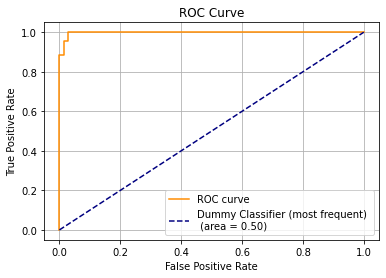

0.9977071732721914


In [17]:
# Create an instance of LRModel
lr_model = LRModel()

# Train the logistic regression model
lr_model.train(x_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(x_test)

# Print the classification report
lr_model.classification_report(y_test, y_pred)

# Print the confusion matrix
lr_model.confusion_matrix(y_test, y_pred)

# Plot the ROC curve and print the ROC AUC score
lr_model.plot_roc_curve(x_train, y_train, x_test, y_test)

2. K Nearest Neighbor

In [18]:
class KNNModel:
    def __init__(self):
        self.knn_model = KNeighborsClassifier(n_neighbors = 5)

    def train(self, x_train, y_train):
        self.knn_model.fit(x_train, y_train)

    def predict(self, x_test):
        return self.knn_model.predict(x_test)

    def predict_proba(self, x_test):
        return self.knn_model.predict_proba(x_test)

    def classification_report(self, y_test, y_pred):
        print(classification_report(y_test, y_pred))

In [19]:
# Create an instance of KNNModel
knn_model = KNNModel()

# Train the KNN model
knn_model.train(x_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(x_test)

# Print the classification report
knn_model.classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Decision Tree

In [27]:
# Instantiate the Decision Tree model
cart_model = DecisionTreeClassifier()

# Fit the model on the train data
cart_model.fit(x_train, y_train) 

# Make predicitions on the test data
cart_y_pred = cart_model.predict(x_test) 
print(f'Decision tree depth: {cart_model.get_depth()}')

Decision tree depth: 7


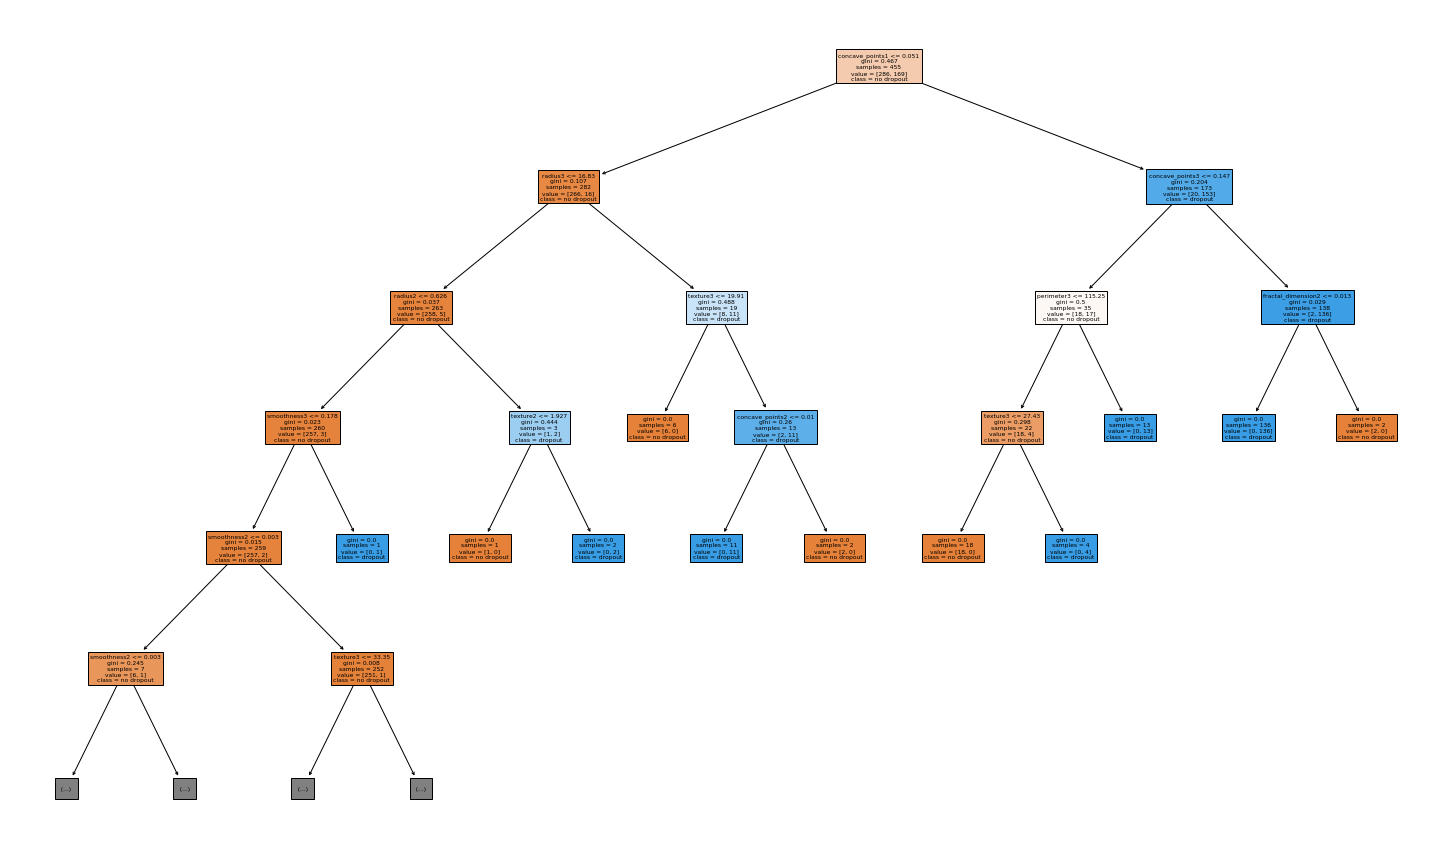

In [28]:
# Plotting the Tree
plt.figure(figsize=(20,12))
tree.plot_tree(cart_model, feature_names = x_train.columns, max_depth=5, class_names = ['no dropout', 'dropout'], label='all', filled=True)
plt.tight_layout()
plt.show()

In [29]:
# Text-based visualization of the tree (View this in the Output terminal!)
print(tree.export_text(cart_model, feature_names = x_train.columns.tolist()))

|--- concave_points1 <= 0.05
|   |--- radius3 <= 16.83
|   |   |--- radius2 <= 0.63
|   |   |   |--- smoothness3 <= 0.18
|   |   |   |   |--- smoothness2 <= 0.00
|   |   |   |   |   |--- smoothness2 <= 0.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- smoothness2 >  0.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- smoothness2 >  0.00
|   |   |   |   |   |--- texture3 <= 33.35
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- texture3 >  33.35
|   |   |   |   |   |   |--- texture3 <= 33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- texture3 >  33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- smoothness3 >  0.18
|   |   |   |   |--- class: 1
|   |   |--- radius2 >  0.63
|   |   |   |--- texture2 <= 1.93
|   |   |   |   |--- class: 0
|   |   |   |--- texture2 >  1.93
|   |   |   |   |--- class: 1
|   |--- radius3 >  16.83
|   |   |--- texture3 <= 19.91
|   |   |   |--- class: 0
|   |   |--- texture3 

In [23]:
# Evalution metrics
print(classification_report(y_test, cart_y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



Random Forest

In [24]:
# Instantiate random forest classifier, fit and score with default parameters
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf.score(x_test, y_test)
print(f'Accuracy score for default random forest: {round(rf.score(x_test, y_test)*100,3)}%')

Accuracy score for default random forest: 95.614%


c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [30]:
# Make predicitions on the test data
y_pred = rf.predict(x_test) 

# Evalution metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Gradient Boosting 

In [35]:
# Instantiate and fit
grad_classifier = GradientBoostingClassifier()
grad_classifier.fit(x_train, y_train)

# Make predicitions on the test data
y_pred = grad_classifier.predict(x_test) 

# Evalution metrics
print(classification_report(y_test, y_pred))

c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Adaptive Boosting

In [36]:
# Instantiate and fit
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(x_train, y_train)

# Make predicitions on the test data
y_pred = ada_classifier.predict(x_test) 

# Evalution metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Bagging Classifier

In [37]:
# Instantiate and fit
bagging_classifier = BaggingClassifier()
bagging_classifier.fit(x_train, y_train)

# Make predicitions on the test data
y_pred = bagging_classifier.predict(x_test) 

# Evalution metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Support Vectors Machine (SMV)

In [33]:
# Instantiate and fit
classifier = SVC()
classifier.fit(x_train, y_train)

# Make predicitions on the test data
y_pred = classifier.predict(x_test) 

# Evalution metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        71
           1       1.00      0.86      0.93        43

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



c:\Users\Bruna Los\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
